In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data

# Combine the data into a single dataset

combined_df = pd.merge(city_data, ride_data, how='outer', on='city')
# Display the data table for preview


In [2]:
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

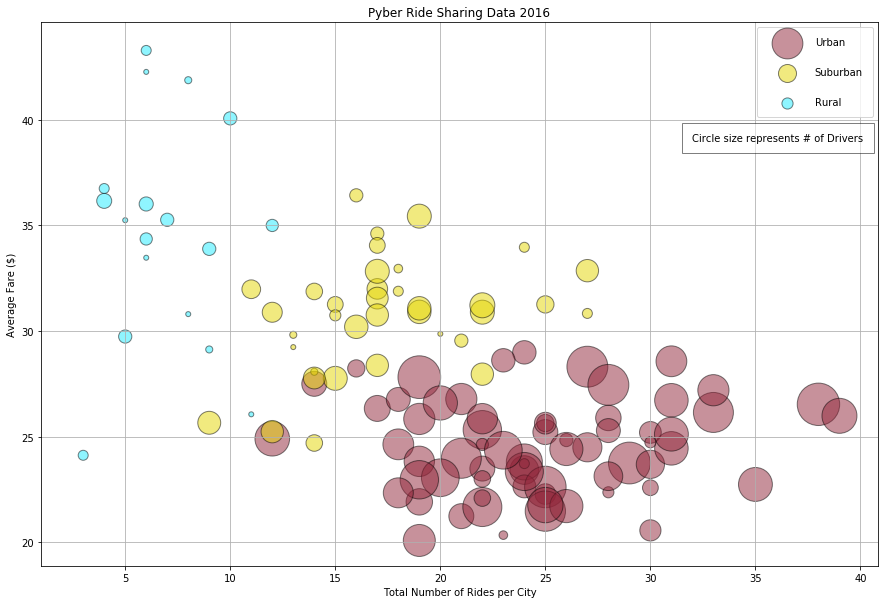

In [265]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df.loc[combined_df["type"]=="Urban"]
groupurban_df = urban_df.groupby(["city"])
urb_ridenumber = groupurban_df["ride_id"].count()
urb_fare = groupurban_df["fare"].mean()
urban2_df = urban_df.copy()
urban2_df.drop_duplicates("city",inplace=True)
combined_urban_df = pd.merge(urb_ridenumber, urb_fare, how='outer', on='city')

suburban_df = combined_df.loc[combined_df["type"]=="Suburban"]
groupsuburban_df = suburban_df.groupby(["city"])
suburb_ridenumber = groupsuburban_df["ride_id"].count()
suburb_fare = groupsuburban_df["fare"].mean()
suburban2_df = suburban_df.copy()
suburban2_df.drop_duplicates("city",inplace=True)
combined_suburban_df = pd.merge(suburb_ridenumber, suburb_fare, how='outer', on='city')


rural_df = combined_df.loc[combined_df["type"]=="Rural"]
grouprural_df = rural_df.groupby(["city"])
rural_ridenumber = grouprural_df["ride_id"].count()
rural_fare = grouprural_df["fare"].mean()
rural2_df = rural_df.copy()
rural2_df.drop_duplicates("city",inplace=True)
combined_rural_df = pd.merge(rural_ridenumber, rural_fare, how='outer', on='city')


# Build the scatter plots for each city types

#urbplot = combined_urban_df.plot(kind ="scatter",x="ride_id",y="fare",s=urban_df["driver_count"]**1.45,grid=True,color="r",edgecolor="black",alpha=.5)
#suburbplot = combined_suburban_df.plot(kind ="scatter",x="ride_id",y="fare",s=suburban_df["driver_count"]**1.45,grid=True,color="b",edgecolor="black",alpha=.5)
#ruralplot = combined_rural_df.plot(kind ="scatter",x="ride_id",y="fare",s=rural_df["driver_count"]**1.45,grid=True,color="g",edgecolor="black",alpha=.5)

fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(urb_ridenumber, urb_fare,s=urban2_df["driver_count"]*25,color="#912539",edgecolor="black",alpha=.5, label="Urban")
plt.scatter(suburb_ridenumber, suburb_fare,s=suburban2_df["driver_count"]*25,color="#e5d600",edgecolor="black",alpha=.5, label="Suburban")
plt.scatter(rural_ridenumber, rural_fare,s=rural2_df["driver_count"]*25,color="#21ecff",edgecolor="black",alpha=.5,label="Rural")
# Create a legend
ax.legend(loc="best", handlelength=4, labelspacing=2,borderpad=1)
ax.grid(True)

# Incorporate the other graph properties
ax.set_title('Pyber Ride Sharing Data 2016')
ax.set_xlabel('Total Number of Rides per City')
ax.set_ylabel('Average Fare ($)')
# Incorporate a text label regarding circle size
ax.text(32, 39, 'Circle size represents # of Drivers',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
# Save Figure
plt.savefig("../Images/Bubbleplot.png")

In [245]:
# Show plot
plt.show()

## Total Fares by City Type

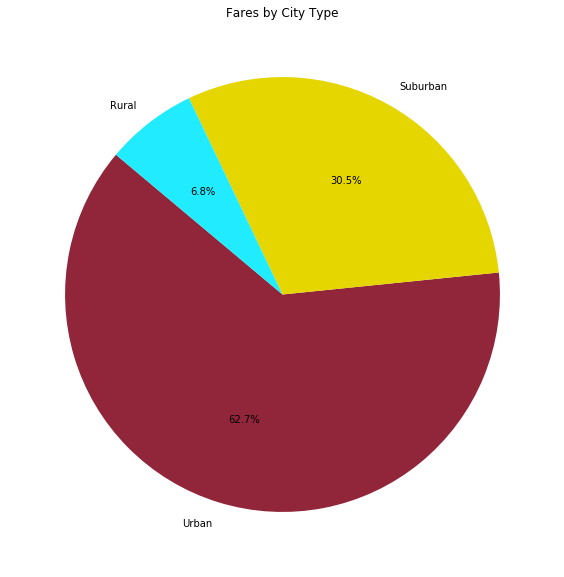

In [266]:
# Calculate Type Percents
urbfare = urban_df["fare"].sum()
subfare = suburban_df["fare"].sum()
ruralfare = rural_df["fare"].sum()
farestotal = [urbfare,subfare,ruralfare]

# Build Pie Chart
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(farestotal,labels=["Urban","Suburban","Rural"],colors=["#912539","#e5d600","#21ecff"],
        autopct="%1.1f%%",startangle=140)
ax.set_title("Fares by City Type")

# Save Figure
plt.savefig("../Images/Farepie.png")

In [261]:
# Show Figure
plt.show()

## Total Rides by City Type

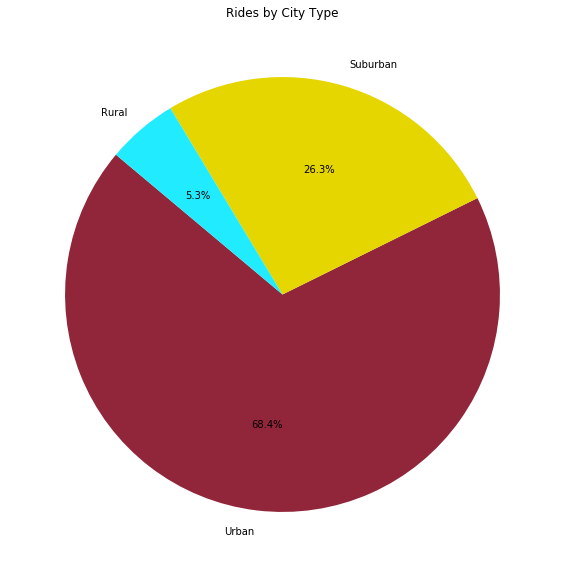

In [270]:
# Calculate Ride Percents
urbrides = urb_ridenumber.sum()
subrides = suburb_ridenumber.sum()
ruralrides = rural_ridenumber.sum()
ridestotal = [urbrides,subrides,ruralrides]
# Build Pie Chart
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(ridestotal,labels=["Urban","Suburban","Rural"],colors=["#912539","#e5d600","#21ecff"],
        autopct="%1.1f%%",startangle=140)
ax.set_title("Rides by City Type")

# Save Figure
plt.savefig("../Images/Ridepie.png")

In [271]:
# Show Figure
plt.show()

## Total Drivers by City Type

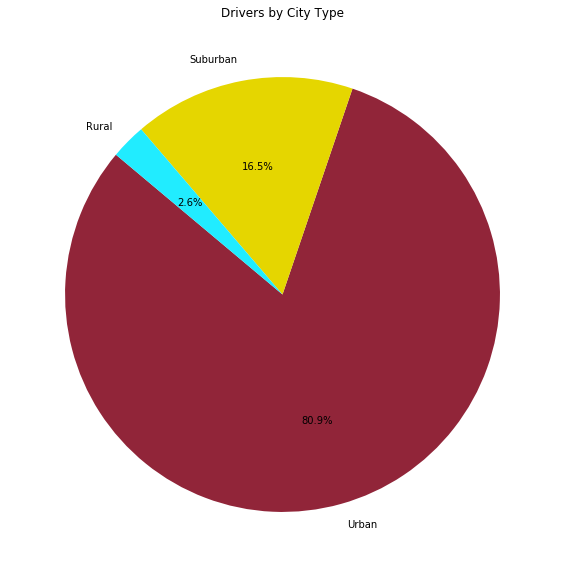

In [275]:
# Calculate Driver Percents
urbdriver = urban2_df["driver_count"].sum()
suburbdriver = suburban2_df["driver_count"].sum()
ruraldriver = rural2_df["driver_count"].sum()
drivertotal = [urbdriver,suburbdriver,ruraldriver]
# Build Pie Charts
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(drivertotal,labels=["Urban","Suburban","Rural"],colors=["#912539","#e5d600","#21ecff"],
        autopct="%1.1f%%",startangle=140)
ax.set_title("Drivers by City Type")

# Save Figure
plt.savefig("../Images/Driverpie.png")


In [276]:
# Show Figure
plt.show()